In [29]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline

**MNIST**    
The images are 28 pixels by 28 pixels for a total of 784 pixels. This is quite small by image standards. Also, the images are well centered and isolated. This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
x_train[1].shape

(28, 28)

In [32]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

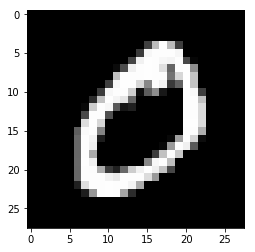

In [33]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap='Greys_r')

In [34]:
y_train[1]

0

In [35]:
# our shapes
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [36]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


In [44]:
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [38]:
np.random.seed(123)  # reproducibility 

model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model_1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 218us/step - loss: 8.5532 - acc: 0.4648 - val_loss: 7.1028 - val_acc: 0.5582
Epoch 2/10
41664/60000 [===================>..........] - ETA: 3s - loss: 7.3866 - acc: 0.5394

KeyboardInterrupt: 

In [ ]:
# I killed the previous train . . 
# because looks like I should normalize my inputs first .. 

In [40]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [48]:
# rerun model after scaling.. 
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [49]:
np.random.seed(123) 

model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history= model_1.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test),batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 85us/step - loss: 1.5111 - acc: 0.5202 - val_loss: 0.7785 - val_acc: 0.7765
Epoch 2/25
60000/60000 [==============================] - 4s 71us/step - loss: 0.7391 - acc: 0.7625 - val_loss: 0.5182 - val_acc: 0.8534
Epoch 3/25
60000/60000 [==============================] - 5s 75us/step - loss: 0.5686 - acc: 0.8246 - val_loss: 0.4190 - val_acc: 0.8828
Epoch 4/25
60000/60000 [==============================] - 4s 69us/step - loss: 0.4868 - acc: 0.8559 - val_loss: 0.3588 - val_acc: 0.9014
Epoch 5/25
60000/60000 [==============================] - 4s 69us/step - loss: 0.4296 - acc: 0.8739 - val_loss: 0.3213 - val_acc: 0.9105
Epoch 6/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.3939 - acc: 0.8835 - val_loss: 0.2950 - val_acc: 0.9158
Epoch 7/25
60000/60000 [==============================] - 4s 62us/step - loss: 0.3608 - acc: 0.8936 - val_loss: 0.2721 - val_acc

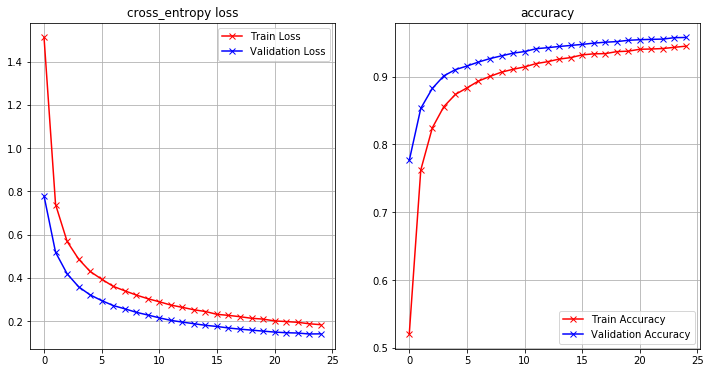

In [50]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

[why is training accuracy lower than val](https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss)

In [51]:
model_2 = Sequential()
model_2.add(Dense(500, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.2))
model_2.add(Dense(500, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation='softmax'))

In [52]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history= model_2.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test),batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 29s 477us/step - loss: 0.8002 - acc: 0.7597 - val_loss: 0.3640 - val_acc: 0.8956
Epoch 2/25
60000/60000 [==============================] - 19s 309us/step - loss: 0.3467 - acc: 0.8981 - val_loss: 0.2806 - val_acc: 0.9150
Epoch 3/25
60000/60000 [==============================] - 24s 397us/step - loss: 0.2744 - acc: 0.9184 - val_loss: 0.2192 - val_acc: 0.9344
Epoch 4/25
60000/60000 [==============================] - 22s 375us/step - loss: 0.2223 - acc: 0.9332 - val_loss: 0.1866 - val_acc: 0.9434
Epoch 5/25
60000/60000 [==============================] - 23s 389us/step - loss: 0.1877 - acc: 0.9440 - val_loss: 0.1572 - val_acc: 0.9516
Epoch 6/25
60000/60000 [==============================] - 19s 324us/step - loss: 0.1597 - acc: 0.9521 - val_loss: 0.1370 - val_acc: 0.9588
Epoch 7/25
60000/60000 [==============================] - 20s 330us/step - loss: 0.1411 - acc: 0.9576 - val_loss: 0.

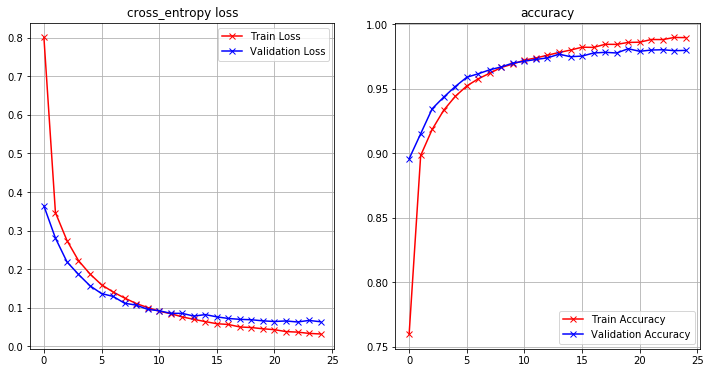

In [53]:
plot_loss_accuracy(history)